In [1]:
import pandas as pd
import os

## Q1. Downloading the data
---
We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".  
Download the data for January and February 2021.  
Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".
Read the data for January. How many records are there?

In [2]:
df = pd.read_parquet(os.path.relpath("data/fhv_tripdata_2021-01.parquet"))
originalRecords = df.shape[0]
print("There are %d records for January 2021" %originalRecords)

There are 1154112 records for January 2021


## Q2. Computing duration
---
Now let's compute the `duration` variable. It should contain the duration of a ride in minutes.  
What's the average trip duration in January?

In [3]:
df['duration'] = df['dropOff_datetime'] - df['pickup_datetime']
averageDuration = df['duration'].mean().total_seconds()/60
print("The average trip duration in January 2021 was %.3f minutes" %averageDuration)

The average trip duration in January 2021 was 19.167 minutes


## Data preparation
---
Check the distribution of the duration variable  
Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).  
How many records did you drop?

In [4]:
df['duration'].describe(percentiles=[.85, .95, .99])

count                      1154112
mean     0 days 00:19:10.033445627
std      0 days 06:38:41.529882844
min                0 days 00:00:01
50%                0 days 00:13:24
85%                0 days 00:29:29
95%                0 days 00:47:15
99%                0 days 01:30:18
max              294 days 00:11:03
Name: duration, dtype: object

44286 records were deleted


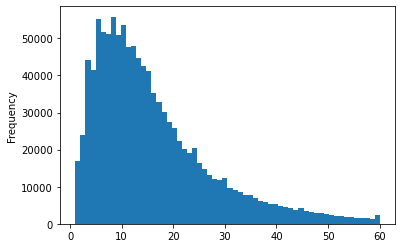

In [5]:
df = df[(df.duration.astype('timedelta64[m]') >= 1) & (df.duration.astype('timedelta64[s]') <= 3600)]
df['duration'].astype('timedelta64[m]').plot.hist(bins = 60)
newRecords = df.shape[0]
print("%d records were deleted" %(originalRecords-newRecords))

## Q3. Missing values
---
The features we'll use for our model are the pickup and dropoff location IDs.  
But they have a lot of missing values there. Let's replace them with "-1".  
What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

In [6]:
df[['PUlocationID', 'DOlocationID']] = df[['PUlocationID', 'DOlocationID']].fillna(value=-1)
missingValues = (df['PUlocationID'] == -1).sum()
print("The fraction of missing values for pickup location ID is: %.2f%%" %(missingValues/newRecords*100))

The fraction of missing values for pickup location ID is: 83.53%


## Q4. One-hot encoding
---
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns).

## Q5. Training a model
---
Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

## Q6. Evaluating the model
---
Now let's apply this model to the validation dataset (Feb 2021).  
What's the RMSE on validation?